<a href="https://colab.research.google.com/github/yusufraji/ai-anomaly-detector-ml-1/blob/main/notebooks/eda_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import re
import numpy as np
from numpy import fft
import pandas as pd
from datetime import datetime, timezone
from pathlib import Path
import matplotlib.pyplot as plt
import pylab as pl
from scipy.signal import savgol_filter

from sklearn.preprocessing import MinMaxScaler

In [ ]:
project_root_dir = Path.cwd() / 'drive' / 'My Drive' / 'applied-data-hackathon' / 'predictive-maintenance'


In [ ]:
def getNowTime():
       return int(datetime.now(tz=timezone.utc).timestamp() * 1000)
nowtime = getNowTime()

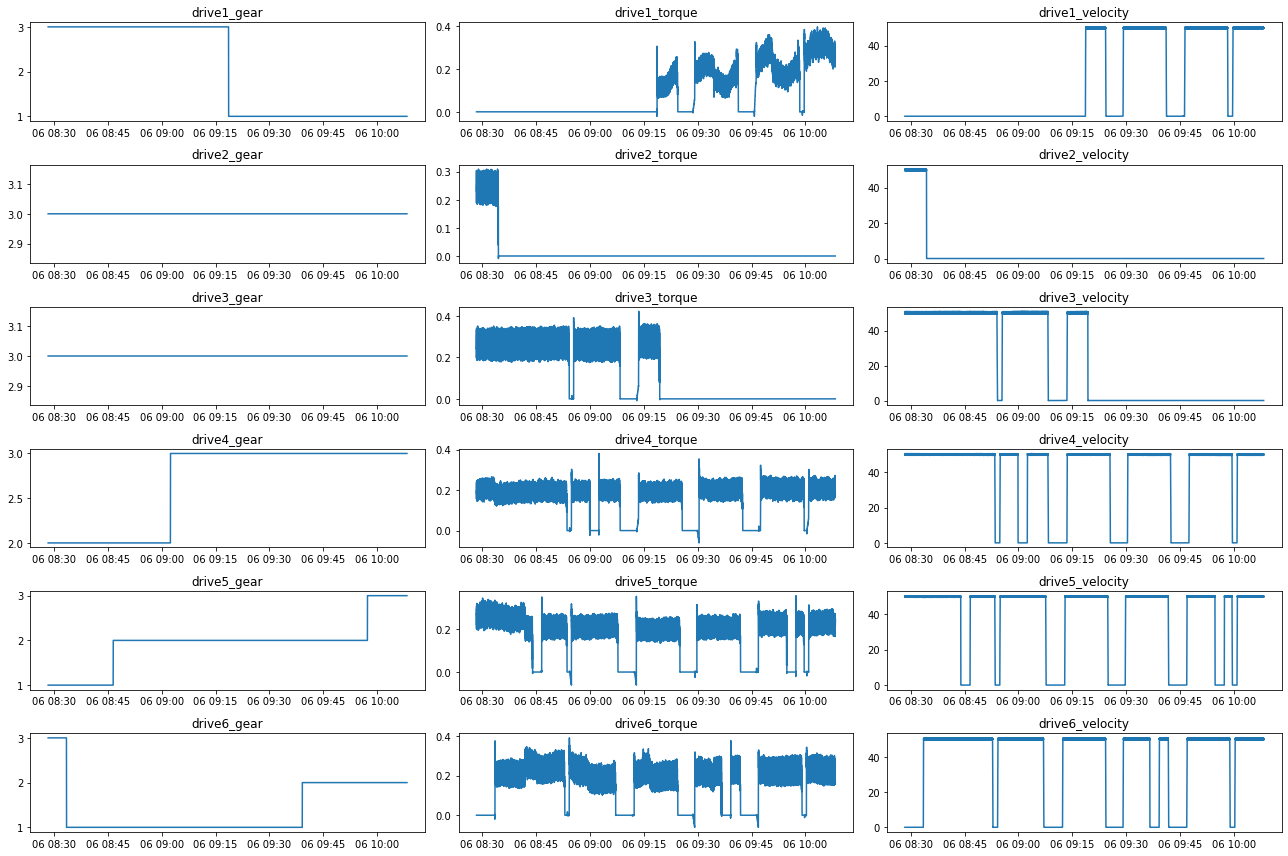

In [ ]:
files = sorted(list((project_root_dir / "cleaned_data2").glob("*.csv")))
fig, axes = plt.subplots(6, 3, figsize=(18, 12))
for (file, ax) in zip(files, axes.flatten()):
  df = pd.read_csv(file, skiprows=range(1,15), parse_dates=['key'], index_col=['key'])
  #df.index = pd.to_datetime(df.index, unit="s")
  
  df.index = pd.to_datetime(df.index*0.012+nowtime, unit='ms')
  ax.plot(df)
  ax.title.set_text(file.stem)
plt.tight_layout()


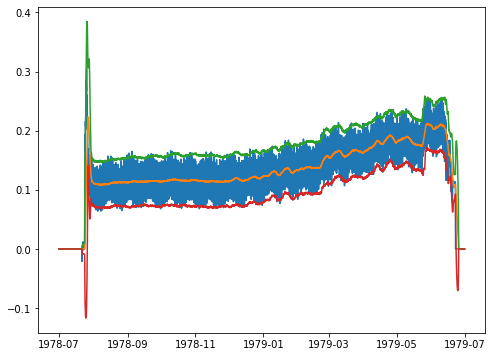

In [ ]:
df = pd.read_csv(project_root_dir/"cleaned_data2"/"drive1_torque.csv", skiprows=range(1,15), parse_dates=['key'], index_col=['key'])
df.index = pd.to_datetime(df.index, unit="s")
df["filt_value"] = savgol_filter(df["value"], 99, 3) # window size (1001 or 99), polynomial order 3
df["sma"] = df["value"].rolling(50).mean()
df["std"] = df["value"].rolling(50).std()
df["bollinger_upper"] = df["sma"] + df["std"] * 2   # calculate upper band
df["bollinger_lower"] = df["sma"] - df["std"] * 2   # calculate lower band

plt.figure(figsize=(8,6))
# plt.plot(df)
plt.plot(df[["value", "sma", "bollinger_upper", "bollinger_lower"]].loc["1978-07-01 00:00:00":"1979-07-01 00:00:00"])

In [ ]:
df["filt_value"] = savgol_filter(df["value"], 51, 3) # window size 51, polynomial order 3

In [ ]:
df

,value,filt_value,sma,std,bollinger_upper,bollinger_lower
key,,,,,,
1970-08-03 04:14:26,0.000,0.000000,NaN,NaN,NaN,NaN
1970-08-03 05:37:41,0.000,0.000000,NaN,NaN,NaN,NaN
1970-08-03 07:00:57,0.000,0.000000,NaN,NaN,NaN,NaN
1970-08-03 08:24:17,0.000,0.000000,NaN,NaN,NaN,NaN
1970-08-03 09:47:46,0.000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1986-06-06 22:11:02,0.252,0.263943,0.26318,0.024063,0.311305,0.215055
1986-06-06 23:34:30,0.260,0.264144,0.26296,0.024040,0.311040,0.214880
1986-06-07 00:57:44,0.235,0.264397,0.26270,0.024274,0.311248,0.214152


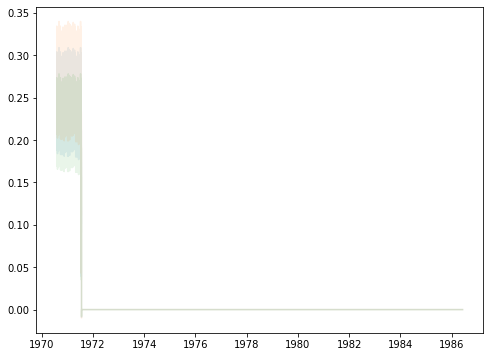

In [ ]:
df = pd.read_csv(project_root_dir/"cleaned_data2"/"drive2_torque.csv", skiprows=range(1,15), parse_dates=['key'], index_col=['key'])
df.index = pd.to_datetime(df.index, unit="s")
df["filt_value"] = savgol_filter(df["value"], 1001, 3) # window size 1001, polynomial order 3
df["max_error"] = df["value"].apply(lambda x: x + (x * 0.1))
df["min_error"] = df["value"].apply(lambda x: x - (x * 0.1))
# df["min_err"] = df["value"] - (df["value"] * 0.1)

plt.figure(figsize=(8,6))
plt.plot(df[['value']], alpha=0.1)
plt.plot(df[['max_error']], alpha=0.1)
plt.plot(df[['min_error']], alpha=0.1)

# plt.fill_between(df.index, df["max_err"], df["min_err"], alpha=1, edgecolor='#3F7F4C', facecolor='#7EFF99', linewidth=0)
# plt.plot(df[['value']].loc["1970-01-01 00:00:00":"1971-09-01 00:00:00"])

In [ ]:
df["value"]

key
1970-08-03 04:14:26    0.231
1970-08-03 05:37:41    0.232
1970-08-03 07:00:57    0.258
1970-08-03 08:24:17    0.279
1970-08-03 09:47:46    0.304
                       ...  
1986-06-06 22:11:02    0.000
1986-06-06 23:34:30    0.000
1986-06-07 00:57:44    0.000
1986-06-07 02:20:59    0.000
1986-06-07 03:44:23    0.000
Name: value, Length: 100000, dtype: float64

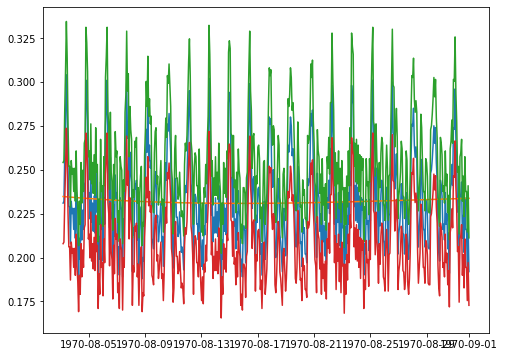

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df.loc["1970-01-01 00:00:00":"1970-09-01 00:00:00"])

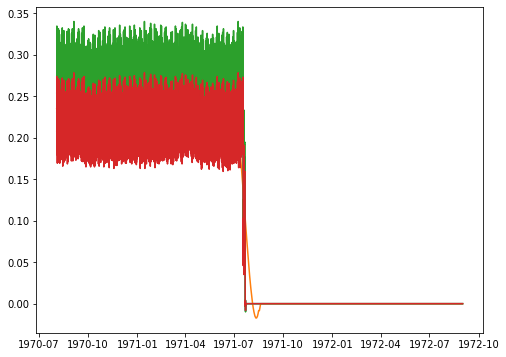

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(df.loc["1970-01-01 00:00:00":"1972-09-01 00:00:00"])

In [ ]:
pd.to_datetime('18504866', format='%Y-%m-%d %H:%M:%S', errors='ignore')

'18504866'

In [ ]:
pd.to_datetime('18504866', unit="m")

Timestamp('2005-03-08 14:26:00')

In [ ]:
def getNowTime():
       return int(datetime.now(tz=timezone.utc).timestamp() * 1000)

In [ ]:
pd.to_datetime(getNowTime(), unit="ms")

Timestamp('2022-03-06 08:24:53.153000')

In [ ]:
nowtime = getNowTime()

In [ ]:
df = pd.read_csv(project_root_dir/"cleaned_data2"/"drive1_torque.csv", skiprows=range(1,15),  index_col=['key'])

df.index = pd.to_datetime(df.index*0.012+nowtime, unit='ms')
df.index

DatetimeIndex(['2022-03-06 08:28:35.221392128',
               '2022-03-06 08:28:35.281331968',
               '2022-03-06 08:28:35.341283840',
               '2022-03-06 08:28:35.401283840',
               '2022-03-06 08:28:35.461392128',
               '2022-03-06 08:28:35.521320192',
               '2022-03-06 08:28:35.581283840',
               '2022-03-06 08:28:35.641404160',
                  '2022-03-06 08:28:35.701536',
               '2022-03-06 08:28:35.761331968',
               ...
               '2022-03-06 10:08:34.621272064',
               '2022-03-06 10:08:34.681308160',
               '2022-03-06 10:08:34.741379840',
               '2022-03-06 10:08:34.801320192',
               '2022-03-06 10:08:34.861320192',
                  '2022-03-06 10:08:34.921344',
                  '2022-03-06 10:08:34.981440',
               '2022-03-06 10:08:35.041367808',
               '2022-03-06 10:08:35.101308160',
               '2022-03-06 10:08:35.161356032'],
              dtype=

(array([738220.35416667, 738220.36458333, 738220.375     , 738220.38541667,
        738220.39583333, 738220.40625   , 738220.41666667]),
 <a list of 7 Text major ticklabel objects>)

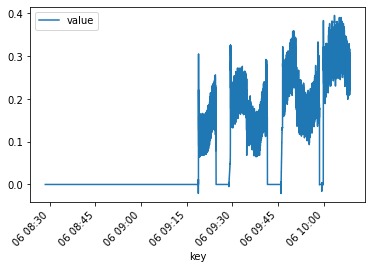

In [ ]:
df.plot()

plt.xticks(rotation=45)

In [ ]:
#ignore this
"""
s = df.index#pd.to_datetime(df.index*00, unit='ns')#, unit='ms')
#df = df.sort_values(by="key")
#df.plot()

nowtime = getNowTime()
import datetime as dt
    
import matplotlib.dates as md
def transform_unixtime(unixtimestamp):
  return dt.datetime.fromtimestamp(unixtimestamp/1000)
#df.index = [transform_unixtime(y+nowtime-150*60*60*1000) for y in ys]
#+nowtime-150*60*60*1000
#df.index = pd.to_datetime(df.index*200+(nowtime-150*60*60*1000)*1000000, unit='ns')
#df.index = pd.to_datetime(60*df.index*200/1000000+nowtime, unit='ms')
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax2.xaxis.set_major_formatter(xfmt)

fig2.show()

ax2.plot(df.index,df.values, color='gold')
fig2.canvas.draw()
"""

'\ns = df.index#pd.to_datetime(df.index*00, unit=\'ns\')#, unit=\'ms\')\n#df = df.sort_values(by="key")\n#df.plot()\n\nnowtime = getNowTime()\nimport datetime as dt\n    \nimport matplotlib.dates as md\ndef transform_unixtime(unixtimestamp):\n  return dt.datetime.fromtimestamp(unixtimestamp/1000)\n#df.index = [transform_unixtime(y+nowtime-150*60*60*1000) for y in ys]\n#+nowtime-150*60*60*1000\n#df.index = pd.to_datetime(df.index*200+(nowtime-150*60*60*1000)*1000000, unit=\'ns\')\n#df.index = pd.to_datetime(60*df.index*200/1000000+nowtime, unit=\'ms\')\nfig2 = plt.figure()\nax2 = fig2.add_subplot(111)\nxfmt = md.DateFormatter(\'%Y-%m-%d %H:%M:%S\')\nax2.xaxis.set_major_formatter(xfmt)\n\nfig2.show()\n\nax2.plot(df.index,df.values, color=\'gold\')\nfig2.canvas.draw()\n'

In [ ]:
df1_torque = pd.read_csv(project_root_dir/"cleaned_data2"/"drive1_torque.csv", skiprows=range(1,15),  index_col=['key'])
df1_velocity = pd.read_csv(project_root_dir/"cleaned_data2"/"drive1_velocity.csv", skiprows=range(1,15),  index_col=['key'])


In [ ]:
df1 = df1_torque.join(df1_velocity, on="key", rsuffix='_velocity', lsuffix="_torque")

In [ ]:
# mark startup, stationary, and shutdown regions
df1["startup"] = df1["value_velocity"].diff(50) > 10
df1["shutdown"] = df1["value_velocity"].diff(50) < -10

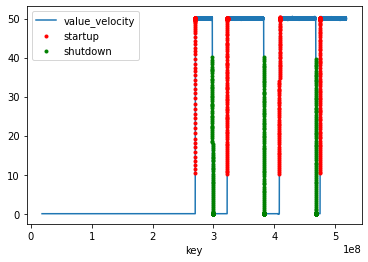

In [ ]:
df1["value_velocity"].plot()
df1["value_velocity"][df1["startup"]].plot(style='r.', label="startup")
df1["value_velocity"][df1["shutdown"]].plot(style='g.', label="shutdown")
plt.legend()

In [ ]:
# scale feature
value_velocity_startup = MinMaxScaler().fit_transform(df1["value_velocity"][df1["startup"]].values.reshape(-1, 1))
value_velocity_shutdown = MinMaxScaler().fit_transform(df1["value_velocity"][df1["shutdown"]].values.reshape(-1, 1))
# scoring function = quantile(0.90) - quantile(0.10)
startup_score = np.percentile(value_velocity_startup, 90) - np.percentile(value_velocity_startup, 10)
shutdown_score = np.percentile(value_velocity_shutdown, 90) - np.percentile(value_velocity_shutdown, 10)

In [ ]:
startup_score, shutdown_score

(0.8501965297204358, 0.8593152633041805)

In [ ]:
# let's try something using fourier extrapolation.
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t


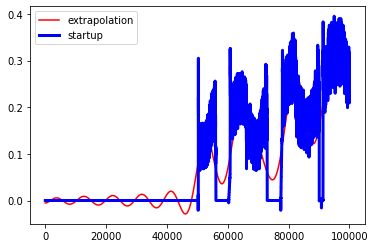

In [ ]:
n_predict = 100
extrapolation = fourierExtrapolation(df1["value_torque"], n_predict)
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
pl.plot(np.arange(0, df1["value_torque"].size), df1["value_torque"], 'b', label = 'startup', linewidth = 3)
pl.legend()
pl.show()


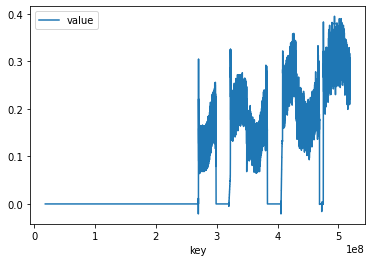

In [ ]:
df_high = pd.read_csv(project_root_dir/"cleaned_data2"/"drive1_torque.csv", skiprows=range(1,15),  index_col=['key'])
df_high["high"] = df_high.plot()